In [2]:
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'], header = None)
iris = iris.dropna()

In [3]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


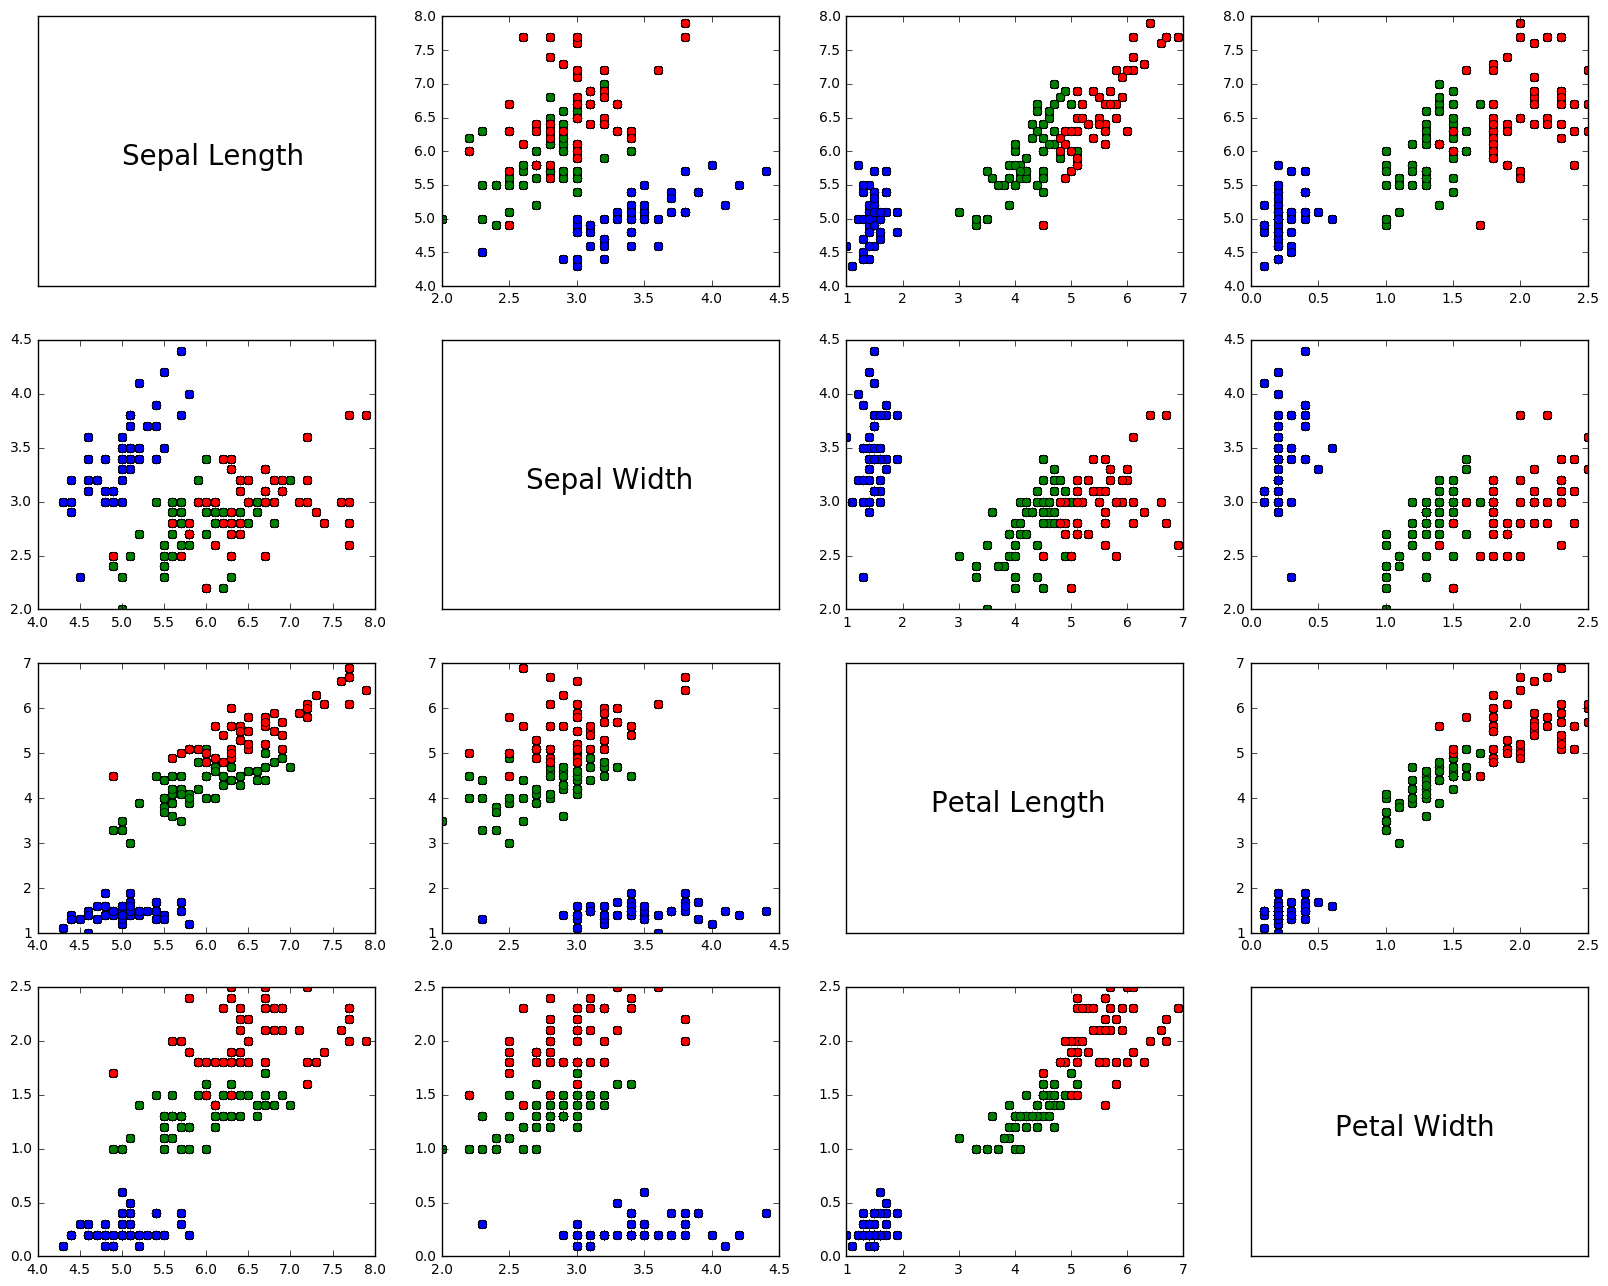

In [4]:
pairs(iris)

In [8]:
from sklearn.cross_validation import train_test_split
from sklearn import datasets, linear_model

def helper(predictor, target):
    x = iris[[predictor]]
    y = iris[[target]]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3)
    
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x_train, y_train)

    # The coefficients
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(x_test) - y_test) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(x_test, y_test))

    # Plot outputs
    plt.scatter(x_test, y_test,  color='black')
    plt.plot(x_test, regr.predict(x_test), color='blue',
             linewidth=3)
    

    plt.title(predictor + ' and ' + target)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(predictor)
    plt.ylabel(target)

    plt.show()

Coefficients: 
 [[-0.07013278]]
Mean squared error: 0.21
Variance score: -0.00


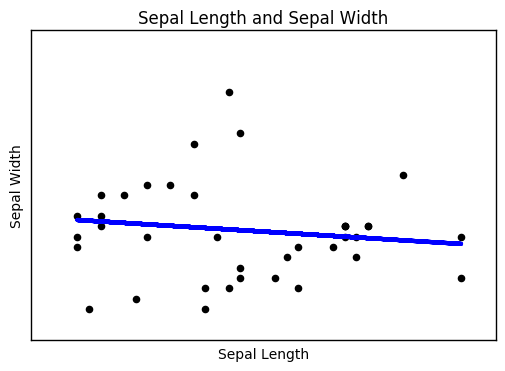

Coefficients: 
 [[-0.23809885]]
Mean squared error: 0.90
Variance score: -0.00


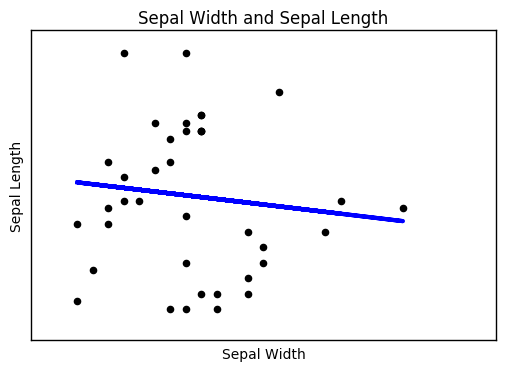

Coefficients: 
 [[ 1.93533478]]
Mean squared error: 0.83
Variance score: 0.75


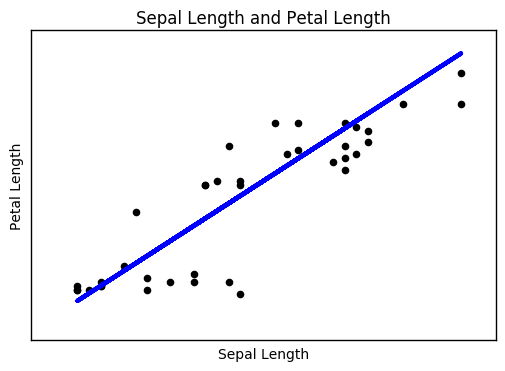

Coefficients: 
 [[ 0.39226206]]
Mean squared error: 0.22
Variance score: 0.76


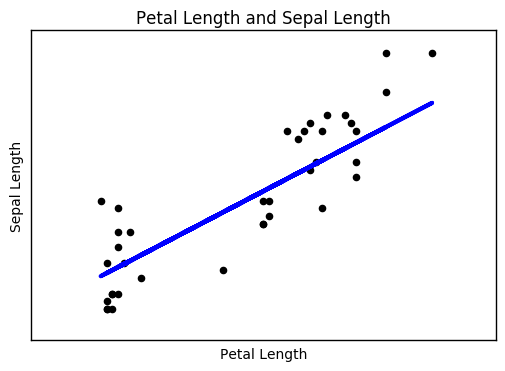

Coefficients: 
 [[ 0.76546776]]
Mean squared error: 0.15
Variance score: 0.76


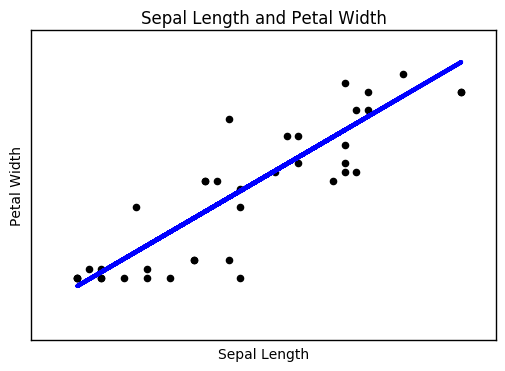

Coefficients: 
 [[ 0.82673141]]
Mean squared error: 0.24
Variance score: 0.73


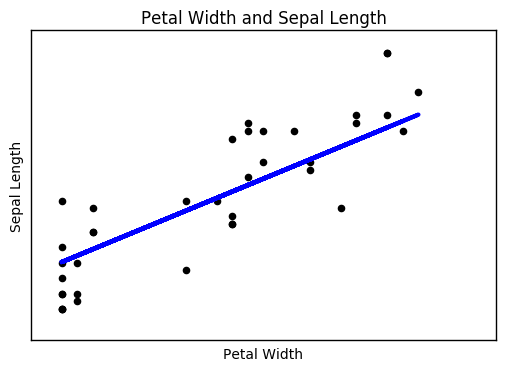

Coefficients: 
 [[-1.7268541]]
Mean squared error: 2.81
Variance score: 0.15


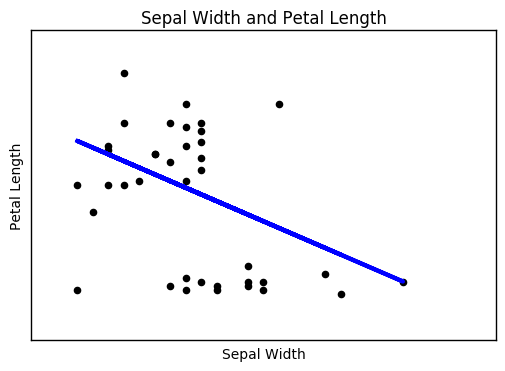

Coefficients: 
 [[-0.10309547]]
Mean squared error: 0.17
Variance score: 0.17


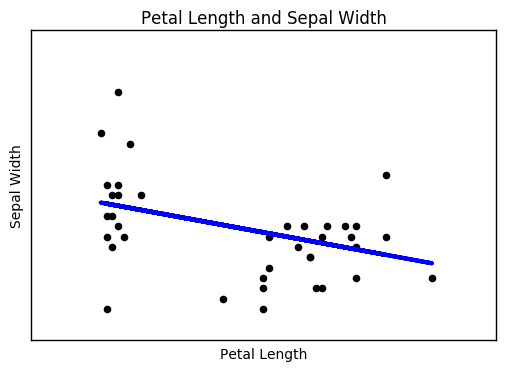

Coefficients: 
 [[-0.64982815]]
Mean squared error: 0.56
Variance score: 0.09


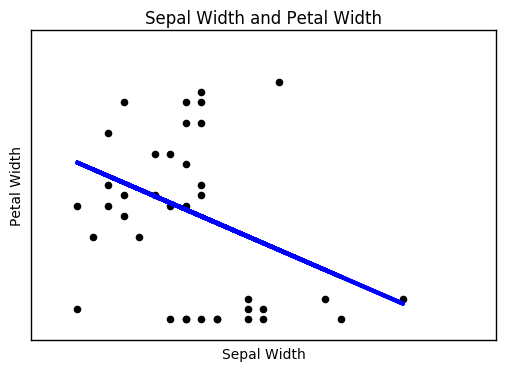

Coefficients: 
 [[-0.20672823]]
Mean squared error: 0.19
Variance score: 0.10


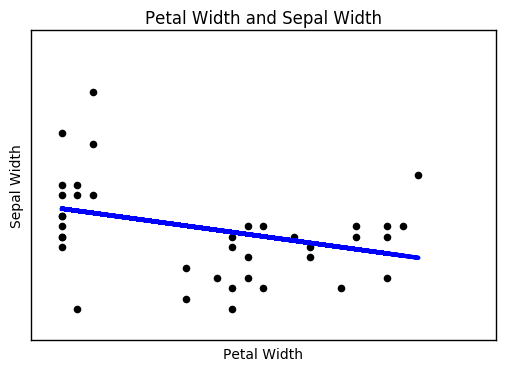

Coefficients: 
 [[ 2.22023178]]
Mean squared error: 0.23
Variance score: 0.93


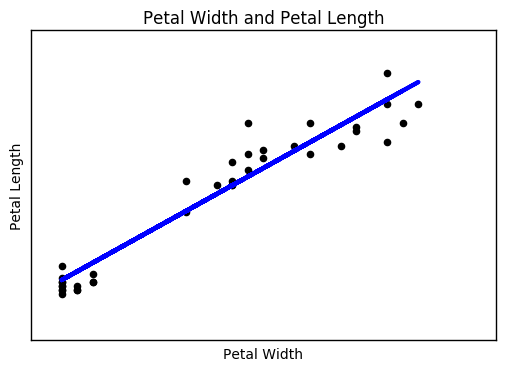

Coefficients: 
 [[ 0.41665921]]
Mean squared error: 0.04
Variance score: 0.93


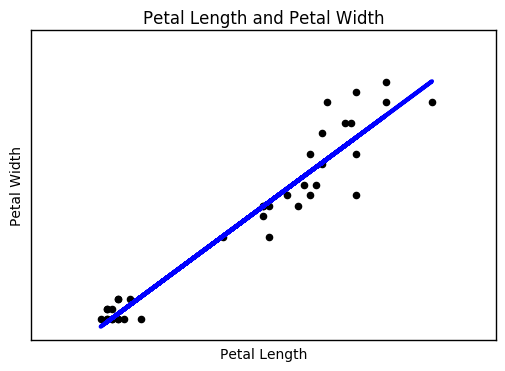

In [6]:
helper('Sepal Length', 'Sepal Width')
helper('Sepal Width', 'Sepal Length')

helper('Sepal Length', 'Petal Length')
helper('Petal Length', 'Sepal Length')

helper('Sepal Length', 'Petal Width')
helper('Petal Width', 'Sepal Length')

helper('Sepal Width', 'Petal Length')
helper('Petal Length', 'Sepal Width')

helper('Sepal Width', 'Petal Width')
helper('Petal Width', 'Sepal Width')

helper('Petal Width', 'Petal Length')
helper('Petal Length', 'Petal Width')


Coefficients: 
 [[ 0.41665921]]
Mean squared error: 0.04
Variance score: 0.93


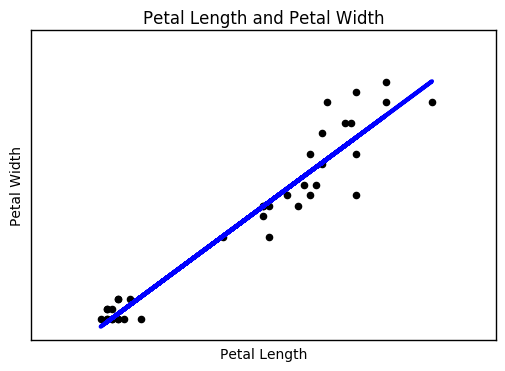

In [7]:
# The best overall linear regression model: Petal Length and Petal Width
helper('Petal Length', 'Petal Width')

1. The Petal Length and Petal Width appear to be the most predictive for one another. According to the plots above, these two features' plot have minimum mean squared error and the highest viriance score, which suggest that these two features could be best described as the linear regression model.

2. Based on the linear regression model, we found that Petal Length and Petal Width are strongly related while others are not. Thus, once we know one of the Petal Length or Petal Width, we can infer another feature from the model. In other words, if we remove Petal Length or Petal Width, there are not going to have much influence on the classification performance. Based on this explaination, the feature which has no high variance score with all other features tend to has much influence on the classification prefermance if it's removed, for example Sepal Width. If we remove Sepal Width, the classification might be less explicit.